In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

In [ ]:
def neighbor(L,num):

  right = num+1
  if right % L == 0:
    right -= L

  left = num-1
  if (left+1) % L == 0:
    left += L

  up = num - L
  if up < 0:
    up += L*L

  down = num + L
  if down >= L*L:
    down -= L*L

  return np.array([right,up,left,down])

def neighbor_E(arr, num): # num의 이웃 값들을 이용하여 에너지를 구하는 함수
  L = int(np.sqrt(len(arr)))
  return -np.sum(arr[neighbor(L,num)])*arr[num]

def E_total(S):
  L=int(np.sqrt(len(S)))
  E=0
  for num in range(len(S)):
    E += (neighbor_E(S, num))
  return E/2

def delta_E(arr, number):
  L=int(np.sqrt(len(arr)))
  return 2*(arr[number]) * np.sum(arr[neighbor(L,number)])

In [ ]:
def change_spin_E(beta,L, t=1000):
  delta_m4 = np.exp(beta*(-4)) # 미리계산
  delta_m8 = np.exp(beta*(-8)) # 미리계산


  random_arr = np.random.randn(L*L)
  S = random_arr/abs(random_arr)
#  print(S)

  E_S = E_total(S)
  m = np.sum(S)/len(S)

  E_list=[E_S]
  m_list=[m]
  S_list=[S]

#  print('first E:',E_S,', first m:',m)

  for t in range(t):
      # random number, 새로운 U생성
      U = S.copy()
      number = np.random.choice(len(S))
      U[number] *= -1
  #    print(number,'번째 flip')

      # delta
      delta = delta_E(S, number) # delta == (-E_S+E_U)
      E_U = E_S + delta
  #    print('delta=',delta, end=', ')

      # accept 확률
      if delta <= 0:
        accept_S_to_U = 1
      else:
        if delta == 4:
          accept_S_to_U = delta_m4
        elif delta == 8:
          accept_S_to_U = delta_m8
        else:
          print('error, delta=',delta)

      # accept, 그다음 S 확정, 측정
      if np.random.random() < accept_S_to_U:
        S = U.copy()
        E_S = E_U.copy()
      m = np.sum(S)/len(S)

      # if t%100 ==0: # 반복횟수가 너무 길어서 조금만 출력
      #   print('t=',t)
      #   print('now E:',E_S,', m:',m)

      E_list.append(E_S)
      m_list.append(m)
      S_list.append(S)

  return E_list, m_list, S_list

In [ ]:
beta = 0.8
L = 5
t = 5000

E_list, m_list, S_list = change_spin_E(beta,L, t)

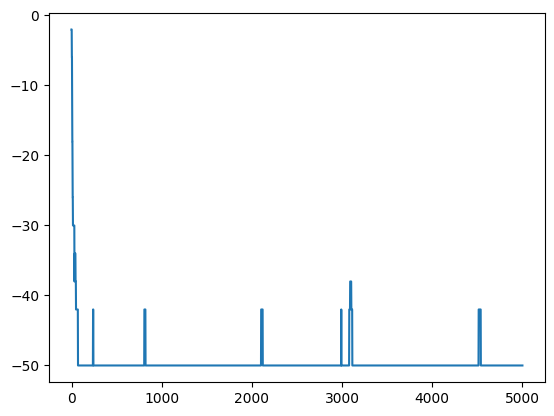

In [ ]:
plt.plot(E_list)

In [ ]:
E_m_list, m_m_list = [],[]
E_lists=[]

L = 5
t = 10500
for i in range(1,101):
  beta = i*0.01

  E_list, m_list, S_list = change_spin_E(beta, L, t)

  E_mean = np.sum(E_list[500:])/(t-500)
  m_mean = np.sum(m_list[500:])/(t-500)

  E_m_list.append(E_mean)
  m_m_list.append(m_mean)
  E_lists.append(E_list[500:]) #500부터~로 잘라서 저장1,101

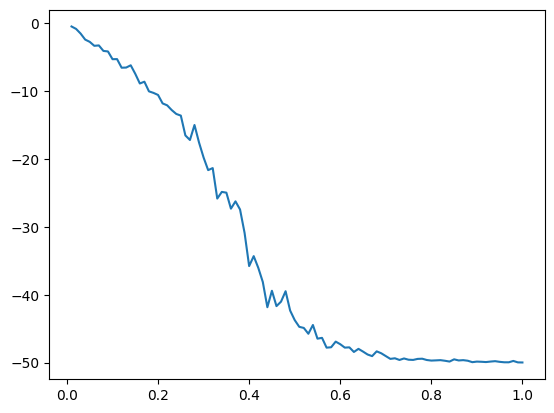

In [ ]:
plt.plot(np.arange(1,101)*0.01, (E_m_list))

In [ ]:
S = Series(E_lists[9]) # beat = 0.1

S_list = []
for i in range(500):
    S_list.append(S.autocorr(i))

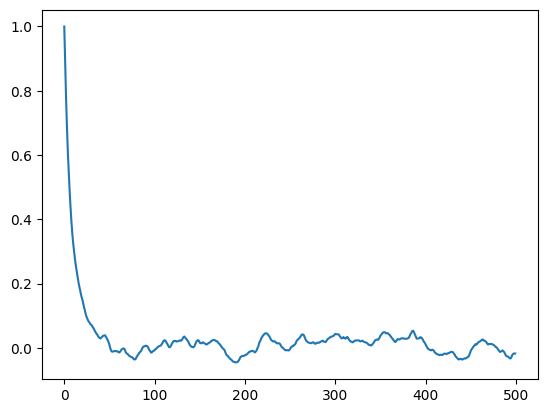

In [ ]:
plt.plot(S_list)

In [ ]:
for i in range(len(S_list)):
  if S_list[i] < 0.01:
    tau = i * 2
    print(tau)
    break

100


In [ ]:
E_lists[9][::tau] # tau 간격으로 뽑은 샘플

[-2.0,
 -6.0,
 10.0,
 -6.0,
 -2.0,
 -6.0,
 2.0,
 -10.0,
 2.0,
 -10.0,
 -14.0,
 -14.0,
 -2.0,
 -14.0,
 -6.0,
 2.0,
 -6.0,
 -2.0,
 2.0,
 -6.0,
 -10.0,
 -10.0,
 -10.0,
 -18.0,
 2.0,
 -18.0,
 -6.0,
 2.0,
 -14.0,
 -2.0,
 -2.0,
 -6.0,
 -10.0,
 -6.0,
 -6.0,
 -6.0,
 -2.0,
 -2.0,
 -2.0,
 2.0,
 -6.0,
 -10.0,
 -10.0,
 -6.0,
 -6.0,
 -2.0,
 -10.0,
 -10.0,
 -14.0,
 -2.0,
 -22.0,
 -14.0,
 -6.0,
 -2.0,
 6.0,
 6.0,
 -6.0,
 -10.0,
 -6.0,
 -2.0,
 -14.0,
 -10.0,
 -14.0,
 6.0,
 6.0,
 -2.0,
 -10.0,
 10.0,
 6.0,
 -2.0,
 -6.0,
 -6.0,
 -2.0,
 -6.0,
 2.0,
 -2.0,
 -2.0,
 -6.0,
 -6.0,
 2.0,
 -18.0,
 -6.0,
 -6.0,
 -2.0,
 10.0,
 2.0,
 -14.0,
 -6.0,
 2.0,
 2.0,
 -2.0,
 -14.0,
 2.0,
 -6.0,
 -6.0,
 -18.0,
 -6.0,
 -2.0,
 2.0,
 2.0,
 2.0]

In [ ]:
std = np.std(E_lists[9][::tau]) # 표준편차

std/np.sqrt(len(E_lists[9][::tau]) - 1) # 표준오차

0.658212579359805

In [ ]:
er_list = []
for i in range(1,11):
  S = Series(E_lists[10*i - 1])
  S_list = []
  for k in range(500):
    S_list.append(S.autocorr(k))
  for t in range(len(S_list)):
    if S_list[t] < 0.01:
      tau = t * 2
      break
  std = np.std(E_lists[10*i - 1][::tau]) # 표준편차
  er_list.append(std/np.sqrt(len(E_lists[10*i - 1][::tau]) - 1))

print(er_list)

[0.658212579359805, 0.7040722109521582, 1.493726572477151, 2.9860788111948193, 1.6853001769389728, 0.8723240882641815, 0.41379310344827586, 0.1539022789621253, 0.13559322033898305, 0.04938271604938272]


<ErrorbarContainer object of 3 artists>

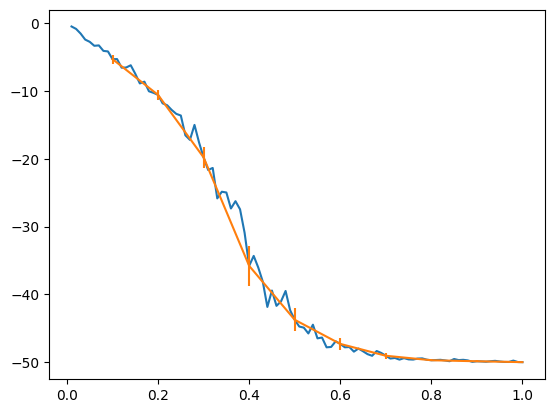

In [ ]:
plt.plot(np.arange(1,101)*0.01, E_m_list)
plt.errorbar(np.arange(1,11)*0.1, E_m_list[9::10], er_list)

In [ ]:
beta_1 = np.arange(0.1,0.4,0.1)
beta_2 = np.arange(0.4,0.6,0.01)
beta_3 = np.arange(0.6,1.01,0.1)

beta_list = np.concatenate((beta_1, beta_2, beta_3))

print(beta_list)

[0.1  0.2  0.3  0.4  0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49
 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.7  0.8  0.9
 1.  ]


In [ ]:
E_m_list, m_m_list = [],[]
E_lists, m_lists = [],[]

L = 5
t = 100000
for beta in beta_list:

  E_list, m_list, S_list = change_spin_E(beta, L, t)

  E_mean = np.sum(E_list[500:])/(t-500)
  m_mean = np.sum(m_list[500:])/(t-500)

  E_m_list.append(E_mean)
  m_m_list.append(abs(m_mean))
  E_lists.append(E_list[500:])
  m_lists.append(m_list[500:])

In [ ]:
E_std, m_std = [],[]
S_list, er_list = [],[]

t = 100000

for i in range(len(E_lists)):
    S = Series(E_lists[i])
    S_list.append(S.autocorr(i))
    for k in range(len(S_list)):
        if S_list[k] < 0.01:
            tau = k * 2
            break
    sam_E = E_lists[i][tau::tau]
    std_E = np.std(sam_E)
    se_E = std_E/np.sqrt(len(sam_E)-1)
    E_std.append(se_E)

    sam_m = m_lists[i][tau::tau]
    std_m = np.std(sam_m)
    se_m = std_m/np.sqrt(len(sam_m)-1)
    m_std.append(se_m)

<ErrorbarContainer object of 3 artists>

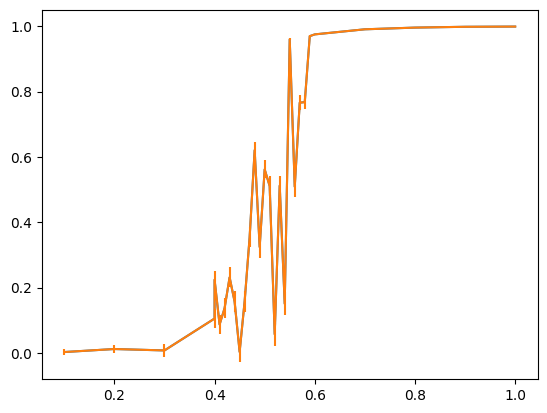

In [ ]:
plt.plot(beta_list, (m_m_list))
plt.errorbar(beta_list, m_m_list, m_std)

In [ ]:
E_m_list, m_m_list = [],[]
E_lists, m_lists = [],[]

L = 10
t = 100000
for beta in beta_list:

  E_list, m_list, S_list = change_spin_E(beta, L, t)

  E_mean = np.sum(E_list[500:])/(t-500)
  m_mean = np.sum(m_list[500:])/(t-500)

  E_m_list.append(E_mean)
  m_m_list.append(abs(m_mean))
  E_lists.append(E_list[500:])
  m_lists.append(m_list[500:])

In [ ]:
E_std, m_std = [],[]
S_list, er_list = [],[]

t = 100000

for i in range(len(E_lists)):
    S = Series(E_lists[i])
    S_list.append(S.autocorr(i))
    for k in range(len(S_list)):
        if S_list[k] < 0.01:
            tau = k * 2
            break
    sam_E = E_lists[i][tau::tau]
    std_E = np.std(sam_E)
    se_E = std_E/np.sqrt(len(sam_E)-1)
    E_std.append(se_E)

    sam_m = m_lists[i][tau::tau]
    std_m = np.std(sam_m)
    se_m = std_m/np.sqrt(len(sam_m)-1)
    m_std.append(se_m)

<ErrorbarContainer object of 3 artists>

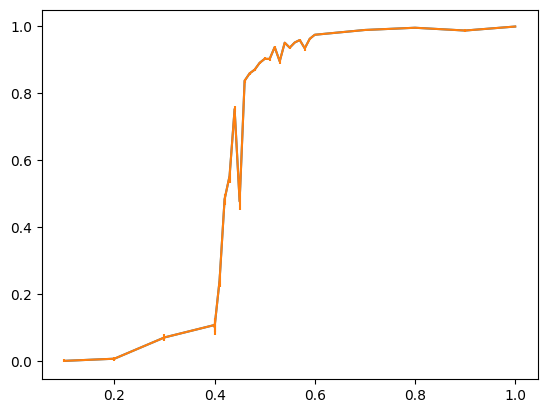

In [ ]:
plt.plot(beta_list, (m_m_list))
plt.errorbar(beta_list, m_m_list, m_std)